# Optimizing monetary policy for central banking using Reinforcement Learning

__Authors:__

Krisha Chandnani

Ignacio Orueta

Leonardo Luksic

## ABSTRACT

This project aims to train and choose an optimal policy for...

## 1 INTRODUCTION

Central banks' main objective is to maintain low inflation while promoting maximum employment. These two objectives are generally seen as complementary. To accomplish this, they set the interest rate levels $i_t$ in each period. The strategy of determining $i_t$ is one of the most debated optimization problems in macroeconomics, which is often described by a simple interest rate reaction function, which responds to inflation and the difference between actual output and the output that maximizes employment (i.e., the output gap). (Taylor, 1993).

However, while this approach tries to represent the actual interest rate setting behaviour of central banks, is still on debate wether this policy function is optimal with respect to fulfilling central banks' objectives given their inflation and output gap targets. (Hinterlang & Tanzer, 2021). The assumption of linear relationships and fixed coefficients in these frameworks often restricts their ability to capture complex, nonlinear economic dynamics. This limitation becomes particularly important during periods of economic volatility, where traditional models may fail to account for structural changes and nonlinearities. (Ballesteros, et al., 2025).

In this project, we follow prior research by Hinterlang & Tanzer (2021) and Ballesteros, et al. (2025) to explore applications of Reinforcement Learning (RL) algorithms to obtain an optimal monetary policy rule for the __XX Central Bank(?)__. Using data from the US Federal Reserve and the Bank of England, respectively, both studies have shown that RL can significantly reduce central bank losses by adapting policies dynamically to economic conditions. As monetary policy can be framed as a sequential decision-making problem, the RL agent can learn from interactions with the environment, optimizing the nominal interest rate to achieve inflation and output gap targets. This study shows that, using data from the __XX Central Bank(?)__, RL-optimized policies outperform traditional rules and, more importantly, historical interest rate paths set by the central bank itself.


## 3 METHODOLOGY

### 3.1 Problem definition

The central's bank objetive is to minimize the gaps between actual and target inflation, and actual and potential output. This can be framed as a RL task, where the central bank determines its optimal reaction function for the nominal interest rate by interacting with the proposed economic environment. This environment evolves based on historical data. (Ballesteros, et al., 2025).

The minimization process led by the central bank operates within a dynamic programming framework. For each time period, the agent receives a reward based on deviations of inflation and the output gap from their respective targets, guiding it to optimize the following loss function:

$$\mathcal{L} = E[∑_{t=0}^T\gamma^t(\omega_\pi(\pi_t-\pi^*)^2 + \omega_y(y_t -y^*)^2)]$$

where $\pi^*$ and $y^∗$ are the inflation and output gap targets, respectively, $\gamma$ is the discount factor, and $\omega_\pi$, $\omega_y$ are weights reflecting the relative importance of stabilizing inflation and the output gap. The reward function is defined explicitly in the environment, where the agent’s action ($i_t$) directly impacts future states of inflation ($\pi_{t+1}$) and the output ($y_{t+1}$), creating a feedback loop that facilitates learning.


## 3.2 Data

In order to create the environment, we use historical data from the __XX Central Bank__, covering the period from __XX to XX__. This data includes quarterly information on inflation rates, output gap estimates, and interest rates.   


### 3.2 RL framework


#### 3.2.1 Markow Decision Process (MDP)

MDPs formally describe an environment for the problem of learning. Here, the agent interacts with a fully observable environment at each discrete time step $t= 0,1,2,3,4...T$. (Sutton & Barto,1998). At each time step $t$, the agent receives some representation of the environment’s state, $S_t$, where $S_t \in S$, and on that basis selects an action, $A_t$, where $A_t \in A(s)$. One time step later, the agent receives a reward, $R_t+1$, where $R \rightarrow R$, and finds itself in a new state, $S_t+1$. The MDP and agent together thereby give rise to a sequence or trajectory that begins like this:

$$S_0,A_0,R_1,S_1,A_1,R_2,S_2,A_2,R_3...$$

Environment state $S$ is a state sequence with an initial state $s_0$. For environment conditions $S$, actions $A$ are accessible. Reward function $R$ is a map of immediate rewards for a given (state, action) pair. The likelihood of transitioning from states $s_0,...,s_i$ to state $s_{i+1}$ is known as state transition probability (P). However, because the environment has endless state sequences, calculating the transition probability for all of them is impossible (Ng, 2003). Therefore, MDP is based on the Markov assumption, which claims that the probability of transitioning to a new state $s_{i+1}$ is only dependent on
$s_i$ instead of past states (Hermanns, 2002), which suggests that:

$$P(s_{i+1}| s_i,a_i,...s_0,a_0) \approx P(s_{i+1}|s_i,a_0)$$


The discount factor $\gamma$ discounts the rewards of future states that contribute to the total reward (Littman, 1994). The formula below can be used to calculate the discounted future rewards:

$$R_t(s) = r_t + \gamma r_{t+1} + \gamma^2 r_{t+2} + ... + \gamma^{n-t} r_{n}=\sum_{t\geq0}\gamma^tR_{a,t}(s_t,s_{t+1})$$
The value function can estimate the value of a state sequence beginning with state $s$:

$$V^\pi(s) = E[\sum_{t\geq0}\gamma^tr_t]$$

The optimal is one that produces the highest value for all states:
$$V^\pi(s) = max_\pi V^\pi(s)$$


#### 3.2.2 Q-Learning (?) <font color = "red"> Change to Deep Q </font>

Q-Learning is a model-free reinforcement learning algorithm that compares the expected utility of available actions of each state, without requiring a model of the environment (i.e., model-free). It can handle problems with stochastic transitions and rewards without requiring adaptations. (Li, 2023). This algorithm learns the optimal Q-function, based on the Bellman optimality equation. In this project, we focus on the tabular Q-Learning with a finite Markov Decision Process (MDP) and discrete states ($t$) and actions (interest rates). In this case, the Bellman equation suggests the following Q-value function:

$$Q(s,a) = arg \: \underset{a}{\max} \: Q^{\pi^{*}}(s,a)$$

Given a state $s$, the Q-value function estimates the highest future reward achievable by performing action $a$. By considering the maximum discounted future reward for an agent transitioning from state $s_t$ to $s_{t+1}$ with learning rate $\alpha$, the Q-value function can iteratively converge to the optimal Q-value function (Sutton & Barto,1998), as illustrated below:

$$Q_{t+1}(s_t,a_t) = Q(s_t,a_t) + α[r_{t+1} + \gamma \underset{a}{\max} \: Q_t(s_{t+1},a) - Q_t(s_t,a_t)]$$

In this case, the learned action-value function ($Q$) directly approximates $q*$, the optimal action-value function, independent of the policy being followed.

Then, the substitution of the value function and Q-Learning function is shown as:

$$V^*(s) =  \underset{a}{\max} \: Q^*(s,a)$$

And the optimal policy is retrieved from the optimal value function:

$$\pi^*(s) = arg \; \underset{a}{\max} \: Q^*(s,a) $$


### 3.3 Definitions

#### 3.3.1 The environment

The RL framework requires the provision of an environment that determines the next observations in response to the agent's actions (see Figure 1). In our application, the environment represents the economy excluding the central bank. We construct this by using the Gymnasium framework and following Hinterlang & Tanzer (2021) on modelling the economy through two key functions:

$$
y_t = f_{y_t} (y_{t-1},y_{t-2},\pi_{t-1},\pi_{t-2},i_{t-1},i_{t-2}) + \epsilon_{y,t},
$$

$$
\pi_t = f_\pi(y_t,y_{t-1},y_{t-2},\pi_{t-1},\pi_{t-2},i_{t-1}) + \epsilon_{\pi,t},
$$

Where the functions $f_y$ and $f_\pi$ are estimated using machine learning models, __such as linear regression or artificial neural networks (ANNs), to capture both
linear and nonlinear dynamics__.

Figure 1: RL scheme for finding the optimal interest rate in central banking

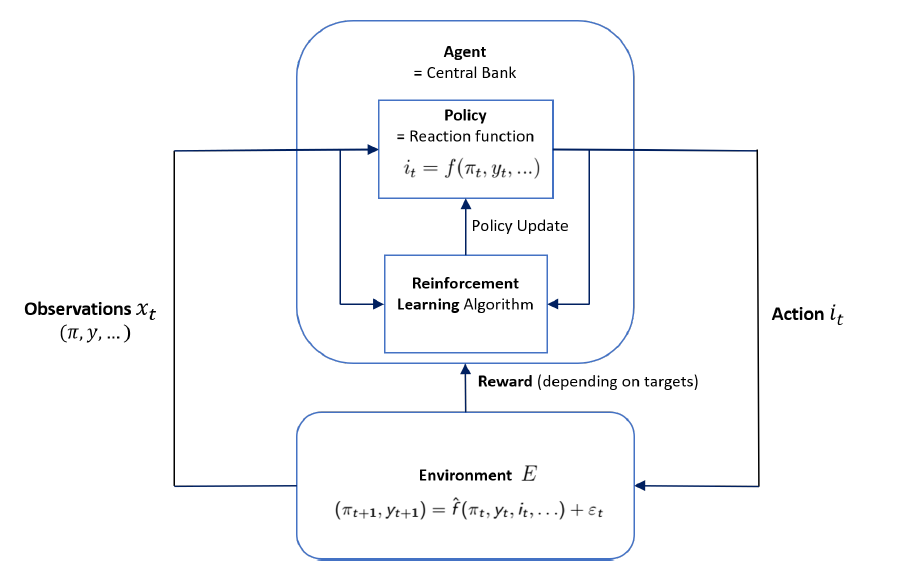

Source: Hinterlang & Tanzer (2021).

#### 3.3.2 The agent
The agent in this framework is the central Bank. It observes certain state variables that serve as inputs to the policy function, but does not know the transition equations. These states variables are the inflation rate ($\pi_t$) and output gap ($y_t-y^*$). Given these observations in each period, the central bank sets a nominal interest rate ($i_t$) and receives a reward, which is derived from the loss function.

#### 3.3.3 The Objective
In order to adjust the monetary policy in an optimal way, we need to determine the respective action value function for each state, as it works as a measure of performance for policy interventions and thus constitutes the basis for policy updates (Hinterlang \& Tanzer, 2021):

$$Q^P(\pi_t,y_t)=\mathbb{E}[R_t|\pi_t,y_t,i_t]$$

with
$$R_t=∑^T_{i=t}\gamma^{i-t}r_t(\pi_t,y_t,i_t)$$

The function $Q^P$ describes the expected return after taking action $i_t$, observing state $\pi_t,y_t$, and following an specific policy thereafter. This recursive relationship is based on the Bellman equation. (Hinterlang & Tanzer, 2021). Then, the return $R_t$ is defined as the sum of discounted future rewards with a discount
factor of $\gamma= 0.99$, which is the mainstream in monetary policy frameworks (Svensson (2020)).

#### 3.3.6 Transitions

We first sample an initial state from historical data. this is useful to emulate different economic contexts. Then, the transition to the next state is given by the inputs of the current state and the predictions of the trained models for next periods' inflation and output gap. Finally, the agent's action and the new state are appended to the dataset.


#### 3.3.4 Action and observation space
The agent selects an action corresponding to the nominal interest rate adjustment, which is set as a positive value. To simplify the problem, we define discrete values for $i_t$ that increase in increments of 0.5.We also set a maximum value of 20, so $i_t$ ranges from 0 to 20.

On the other hand, for each period, the observation space consist of the lagged values of inflation, the output gap and interest rate.

#### 3.3.5 Rewards, goal and evaluation

The rewards function incentivizes the minimization of the deviations of inflation and the output gap:
$$r_t(\pi_t,y_t,i_t)= -\omega_\pi(\pi_{t+1}-\pi^*)^2 -\omega_y(y_t -y^*)^2$$

where $\pi^*=2\%$, and we assign equal weights for each target (i.e., $\omega_\pi=\omega_{y_t}=0.5$).

At the end of each time period, the agent evaluates past actions and adapts future ones accordingly.

## 4 IMPLEMENTATION

Note: We based our code in Ballesteros, et. al., (2025)

In [ ]:
!pip install stable_baselines3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.5/184.5 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 107.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 83.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 87.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
import pandas as pd
import os
import gymnasium as gym
import numpy as np
from collections import defaultdict
import random
from gymnasium.spaces import Box, Discrete
from sklearn.linear_model import LinearRegression
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.monitor import Monitor
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import joblib

# Neural networks
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import random
from collections import deque, namedtuple

### 4.1 Environment set up

### Loading historical data

To evaluate the model, we use interest rates and potential output from the Federal Reserve of the U.S.

In [ ]:
#Reading in the documents
deflator = pd.read_csv('/content/GDPDEF.csv', parse_dates=['observation_date'], index_col='observation_date',usecols=['observation_date', 'GDPDEF'])
real_gdp = pd.read_csv('/content/GDPC1.csv', parse_dates=['observation_date'], index_col='observation_date',usecols=['observation_date', 'GDPC1'])
potential_gdp = pd.read_csv('/content/GDPPOT.csv', parse_dates=['observation_date'], index_col='observation_date', usecols=['observation_date', 'GDPPOT'])
bank_rate = pd.read_csv('/content/FEDFUNDS.csv', parse_dates=['observation_date'], index_col='observation_date',usecols=['observation_date', 'FEDFUNDS'])

In [ ]:
#Changing column names for better understanding
deflator.columns = ['deflator']
real_gdp.columns = ['real_gdp']
potential_gdp.columns = ['potential_gdp']
bank_rate.columns = ['bank_rate']

In [ ]:
gdp = pd.merge(potential_gdp, real_gdp, on='observation_date')
gdp

,potential_gdp,real_gdp
observation_date,,
1949-01-01,2254.866716,2260.807
1949-04-01,2287.486427,2253.128
1949-07-01,2321.150343,2276.424
1949-10-01,2352.817952,2257.352
1950-01-01,2380.500009,2346.104
...,...,...
2023-01-01,22208.242540,22403.435
2023-04-01,22333.112390,22539.418
2023-07-01,22459.740680,22780.933


In [ ]:
#Computing Inflation (Using Deflator), Output Gap (Using Real and Potential GDP) and Resampling Bank Rate
#Inflation
inflation = deflator.pct_change(periods=4) * 100
inflation_q = inflation.resample('QE').last()

#Output Gap
output_gap = (gdp["real_gdp"] - gdp["potential_gdp"]) / gdp["potential_gdp"] * 100
output_gap_q = output_gap.resample('QE').last()

#Bank Rate
bank_rate_q = bank_rate.resample('QE').mean()

In [ ]:
#Combining the dataframes into 1
historical = pd.concat([inflation_q, output_gap_q, bank_rate_q], axis = 1)
#historical = pd.concat(historical, bank_rate_q, on = "observation_date")
historical.columns = ['inflation', 'output_gap', 'bank_rate'] #Renaming the columns
historical = historical.dropna()

#Inspecting the dataset
historical.head()

,inflation,output_gap,bank_rate
observation_date,,,
1954-09-30,0.727219,-1.570996,1.030000
1954-12-31,0.814754,-0.255623,0.986667
1955-03-31,0.967218,1.983082,1.343333
1955-06-30,1.290941,2.980351,1.500000
1955-09-30,1.863857,3.720764,1.940000


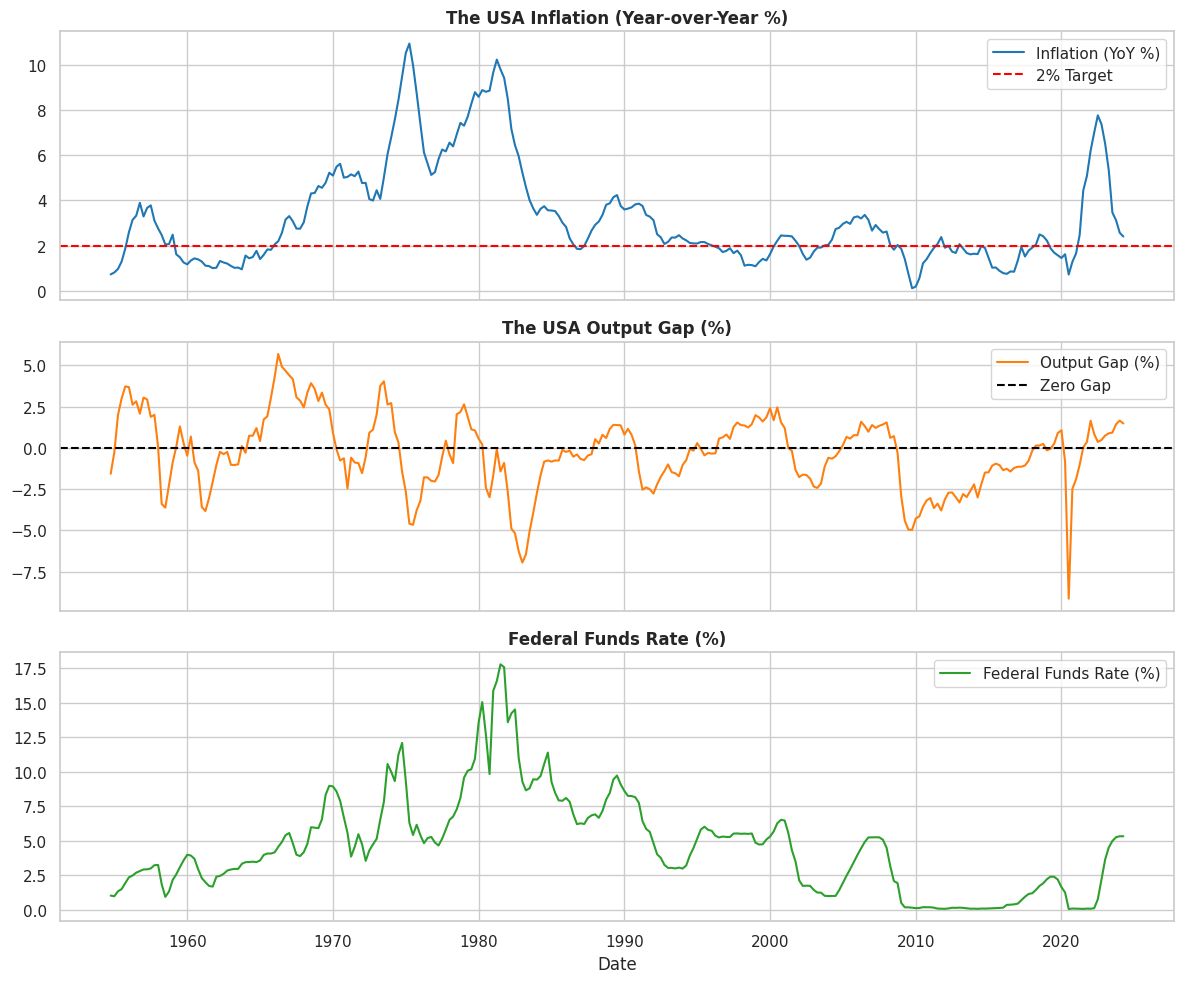

In [ ]:
#Plotting the data series for verification
sns.set_theme(style='whitegrid')
fig, axes = plt.subplots(3, 1, figsize=(12, 10), sharex=True)

# Inflation plot
axes[0].plot(historical.index, historical['inflation'], label='Inflation (YoY %)', color='tab:blue')
axes[0].axhline(2, color='red', linestyle='--', label='2% Target')
axes[0].set_title('The USA Inflation (Year-over-Year %)', fontweight = "bold")
axes[0].legend()

# Output Gap plot
axes[1].plot(historical.index, historical['output_gap'], label='Output Gap (%)', color='tab:orange')
axes[1].axhline(0, color='black', linestyle='--', label='Zero Gap')
axes[1].set_title('The USA Output Gap (%)', fontweight = "bold")
axes[1].legend()

# Bank Rate plot
axes[2].plot(historical.index, historical['bank_rate'], label='Federal Funds Rate (%)', color='tab:green')
axes[2].set_title('Federal Funds Rate (%)', fontweight = "bold")
axes[2].set_xlabel('Date')
axes[2].legend()

plt.tight_layout()
plt.show()

In [ ]:
#Creating lags for the variables
historical['L1_y'] = historical['output_gap'].shift(1)
historical['L2_y'] = historical['output_gap'].shift(2)
historical['L1_pi'] = historical['inflation'].shift(1)
historical['L2_pi'] = historical['inflation'].shift(2)
historical['L1_i'] = historical['bank_rate'].shift(1)
historical['L2_i'] = historical['bank_rate'].shift(2)

#Drop rows with NaN values created due to lagging
historical = historical.dropna()

### Fitting OLS to the data

Output Gap Model Summary:
                            OLS Regression Results                            
Dep. Variable:             output_gap   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     308.0
Date:                Fri, 02 May 2025   Prob (F-statistic):           2.37e-81
Time:                        07:09:10   Log-Likelihood:                -236.14
No. Observations:                 193   AIC:                             482.3
Df Residuals:                     188   BIC:                             498.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5515     

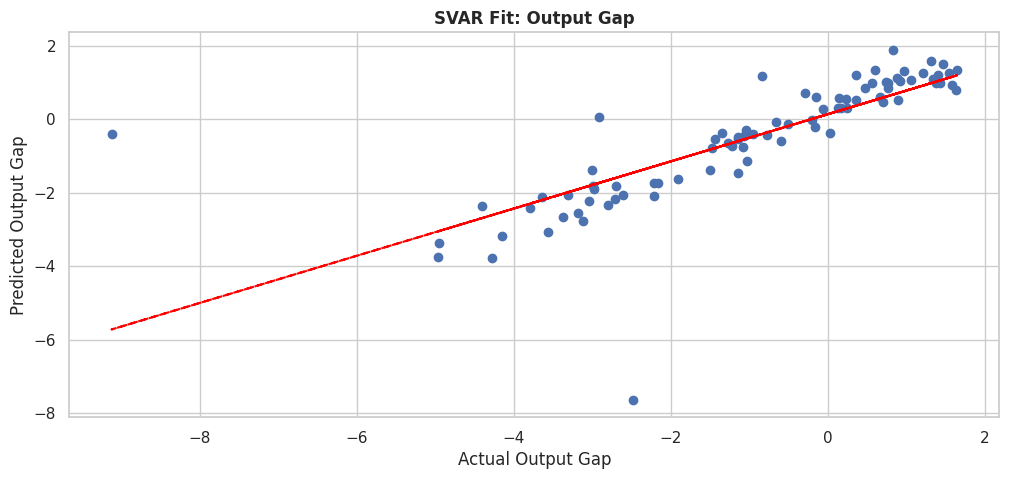

In [ ]:
#Linear Model (ARDL) Implementation
#Output Gap
split_index = int(len(historical) * 0.7)
train_data = historical.iloc[:split_index]
test_data = historical.iloc[split_index:]

# Then define your X and y for train/test from these splits
# Example for Output Gap:
X_y_cols = ['L1_y', 'L1_pi', 'L1_i', 'L2_i'] # Add 'const' later
y_y_col = 'output_gap'

Xy_train = train_data[X_y_cols]
yy_train = train_data[y_y_col]
Xy_test = test_data[X_y_cols]
yy_test = test_data[y_y_col]

Xy_train = sm.add_constant(Xy_train, has_constant='add')
Xy_test = sm.add_constant(Xy_test, has_constant='add')

sm_model_y = sm.OLS(yy_train, Xy_train).fit()
print("Output Gap Model Summary:")
print(sm_model_y.summary())

y_pred_y = sm_model_y.predict(Xy_test)
mse_y = mean_squared_error(yy_test, y_pred_y)

print(f"\nARDL (OLS) Output Gap MSE: {mse_y:.4f}")

fig, ax1 = plt.subplots(1, figsize=(12,5))
ax1.scatter(yy_test, y_pred_y)
ax1.set_xlabel('Actual Output Gap'); ax1.set_ylabel('Predicted Output Gap')
ax1.set_title('ARDL Fit: Output Gap', fontweight = "bold")
slope, intercept = np.polyfit(yy_test, y_pred_y, 1)
x_vals = np.array(yy_test)
y_fit = slope * x_vals + intercept
ax1.plot(x_vals, y_fit, color='red', linestyle='--', label='Best Fit Line')


Inflation Model Summary:
                            OLS Regression Results                            
Dep. Variable:              inflation   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     1437.
Date:                Fri, 02 May 2025   Prob (F-statistic):          1.35e-157
Time:                        07:09:26   Log-Likelihood:                -54.621
No. Observations:                 193   AIC:                             125.2
Df Residuals:                     185   BIC:                             151.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0534     

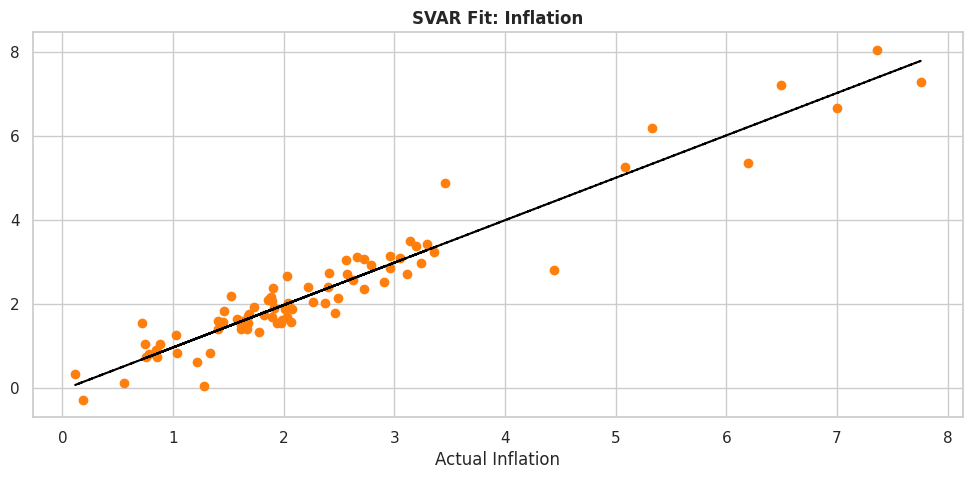

In [ ]:
#Linear Model (ARDL) Implementation
#Inflation
split_index = int(len(historical) * 0.7)
train_data = historical.iloc[:split_index]
test_data = historical.iloc[split_index:]

X_pi_cols = ['output_gap', 'L1_y', 'L2_y', 'L1_pi', 'L2_pi', 'L1_i','L2_i'] # Add 'const' later
y_pi_col = 'inflation'

Xpi_train = train_data[X_pi_cols]
ypi_train = train_data[y_pi_col]
Xpi_test = test_data[X_pi_cols]
ypi_test = test_data[y_pi_col]

Xpi_train = sm.add_constant(Xpi_train, has_constant='add')
Xpi_test = sm.add_constant(Xpi_test, has_constant='add')

sm_model_pi = sm.OLS(ypi_train, Xpi_train).fit()
print("\nInflation Model Summary:")
print(sm_model_pi.summary())

y_pred_pi = sm_model_pi.predict(Xpi_test)
mse_pi = mean_squared_error(ypi_test, y_pred_pi)

print(f"\nARDL (OLS) Inflation MSE: {mse_y:.4f}")

fig, ax2 = plt.subplots(1, figsize=(12,5))
ax2.scatter(ypi_test, y_pred_pi, color = "tab:orange")
ax2.set_xlabel('Actual Inflation'); ax1.set_ylabel('Predicted Inflation')
ax2.set_title('ARDL Fit: Inflation', fontweight = "bold")
slope, intercept = np.polyfit(ypi_test, y_pred_pi, 1)
x_vals = np.array(ypi_test)
y_fit = slope * x_vals + intercept
ax2.plot(x_vals, y_fit, color='black', linestyle='--', label='Best Fit Line')

In [ ]:
#Note: I still need the ols models from sklearn to run the environment.
ols_model_y = LinearRegression()
ols_model_pi = LinearRegression()

# Fit Models
ols_model_y.fit(X_y, y_y)
ols_model_pi.fit(X_pi, y_pi)

LinearRegression()

### Fitting A Neural Network to the Data

Output-gap Neural Network MSE: 2.2293


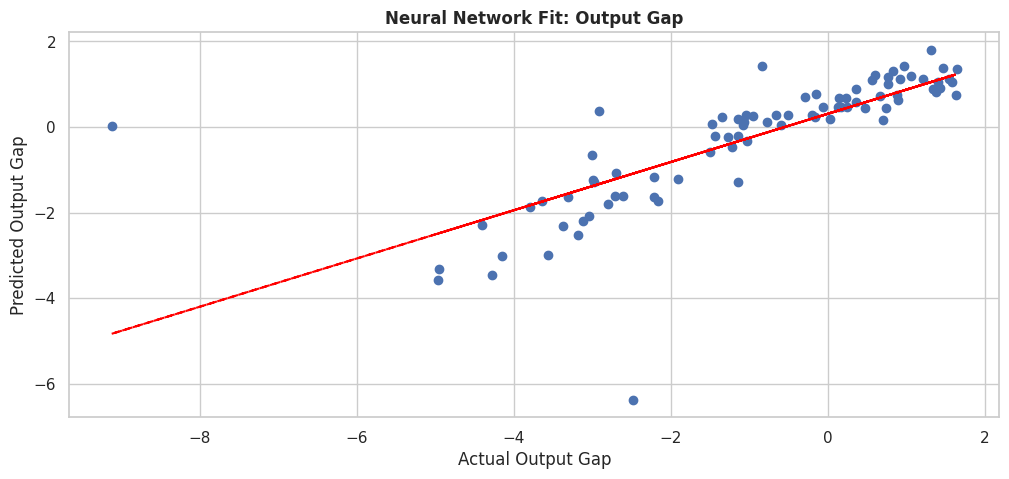

In [ ]:
#Artifical Neural Network (ANN) Implementation
#Output Gap
split_index = int(len(historical) * 0.7)
train_data = historical.iloc[:split_index]
test_data = historical.iloc[split_index:]

# Then define your X and y for train/test from these splits
# Example for Output Gap:
X_y_cols = ['L1_y', 'L1_pi', 'L1_i', 'L2_i'] # Add 'const' later
y_y_col = 'output_gap'

Xy_train = train_data[X_y_cols]
yy_train = train_data[y_y_col]
Xy_test = test_data[X_y_cols]
yy_test = test_data[y_y_col]

mlp_y = MLPRegressor(
    hidden_layer_sizes=(20,20,10), #2 hidden layers with 20, 20 and 10 units
    activation='relu', #ReLu activations
    solver='adam',
    max_iter=2000, #Maximum number of iterations
    random_state=455)

mlp_y.fit(Xy_train, yy_train)
y_y_pred = mlp_y.predict(Xy_test)
mse_y_ann = mean_squared_error(yy_test, y_y_pred)
print(f"Output-gap Neural Network MSE: {mse_y_ann:.4f}")

fig, ax1 = plt.subplots(1, figsize=(12,5))
ax1.scatter(yy_test, y_y_pred)
ax1.set_xlabel('Actual Output Gap'); ax1.set_ylabel('Predicted Output Gap')
ax1.set_title('Neural Network Fit: Output Gap', fontweight = "bold")
slope, intercept = np.polyfit(yy_test, y_y_pred, 1)
x_vals = np.array(yy_test)
y_fit = slope * x_vals + intercept
ax1.plot(x_vals, y_fit, color='red', linestyle='--', label='Best Fit Line')

Inflation Neural Network MSE: 1.0111


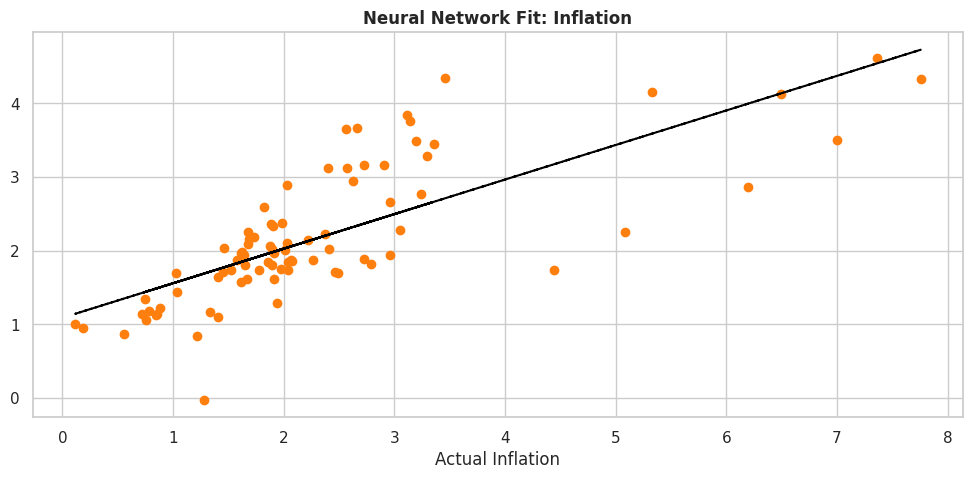

In [ ]:
#Artifical Neural Network (ANN) Implementation
#Inflation
split_index = int(len(historical) * 0.7)
train_data = historical.iloc[:split_index]
test_data = historical.iloc[split_index:]

X_pi_cols = ['output_gap', 'L1_y', 'L2_y', 'L1_pi', 'L2_pi', 'L1_i','L2_i'] # Add 'const' later
y_pi_col = 'inflation'

Xpi_train = train_data[X_pi_cols]
ypi_train = train_data[y_pi_col]
Xpi_test = test_data[X_pi_cols]
ypi_test = test_data[y_pi_col]

mlp_pi = MLPRegressor(
    hidden_layer_sizes=(20,20,10), #3 hidden layers with 20, 20 and 10 units
    activation='relu', #ReLu activations
    solver='adam',
    max_iter=2000, #Maximum number of iterations
    random_state=455)

mlp_pi.fit(Xpi_train, ypi_train)
y_pi_pred = mlp_pi.predict(Xpi_test)
mse_pi_ann = mean_squared_error(ypi_test, y_pi_pred)
print(f"Inflation Neural Network MSE: {mse_pi_ann:.4f}")

fig, ax2 = plt.subplots(1, figsize=(12,5))
ax2.scatter(ypi_test, y_pi_pred, color = "tab:orange")
ax2.set_xlabel('Actual Inflation'); ax1.set_ylabel('Predicted Inflation')
ax2.set_title('Neural Network Fit: Inflation', fontweight = "bold")
slope, intercept = np.polyfit(ypi_test, y_pi_pred, 1)
x_vals = np.array(ypi_test)
y_fit = slope * x_vals + intercept
ax2.plot(x_vals, y_fit, color='black', linestyle='--', label='Best Fit Line')

### SVAR and ANN Comparison

In [ ]:
mse_svar_total = 0.5*(mse_y + mse_pi)
mse_ann_total  = 0.5*(mse_y_ann + mse_pi_ann)
improvement   = (mse_svar_total - mse_ann_total) / mse_svar_total * 100
print(f"ANN reduces total MSE by {improvement:.2f}% compared to SVAR")

ANN reduces total MSE by -60.64% compared to SVAR


<font color = "red">In other words, the OLS model fits the economy better than the Neural Network does in this case! </font>

### Defining the environment

Note: this code is based on previous work from Ballesteros, et al., (2025): https://github.com/Sebastian-Ballesteros/ST449_Project

In [ ]:
environment = historical[["inflation", "output_gap", "bank_rate"]]
environment.head()

,inflation,output_gap,bank_rate
observation_date,,,
1955-03-31,0.967218,1.983082,1.343333
1955-06-30,1.290941,2.980351,1.500000
1955-09-30,1.863857,3.720764,1.940000
1955-12-31,2.593491,3.673726,2.356667
1956-03-31,3.137112,2.610879,2.483333


In [ ]:
class EconomyEnv(gym.Env):
    def __init__(
        self,
        model_y,            #SVAR/OLS model for output gap
        model_pi,           #SVAR/OLS model for inflation
        historical_df,      #Full dataframe for sampling.
        lookback_periods=2, #Number of "quarters" included in the state
        inflation_target=2.0,
        output_gap_target=0.0,
        max_steps=50, #Length of an episode
        mode='discrete',
        min_i=0, #Lower bound for rate action
        max_i=20 #Upper bound for rate action
    ):

        super().__init__() # Calling parent class
       #Store initial DataFrame and reset index
        self.model_y = model_y       #The trained model for predicting Output Gap
        self.model_pi = model_pi     #The trained model for predicting Inflation
        self.lookback_periods = lookback_periods
        self.inflation_target = inflation_target
        self.output_gap_target = output_gap_target
        self.historical_df = historical_df.reset_index(drop=True).copy()
        self.max_steps = max_steps  # number of timesteps per episode
        self.mode = mode

       # Column references
        self.infl_col = 'inflation'
        self.gap_col  = 'output_gap'
        self.rate_col = 'bank_rate'
        self.state_variable_cols = [self.infl_col, self.gap_col, self.rate_col]

        # 1) ACTION SPACE: choose the next interest rate.
        # We set 2 possible modes: discrete and continuous as in http://jbgrabowski.com/notebooks/central-bank/
        if self.mode == 'discrete':
            self.values = np.linspace(min_i, max_i, num=41)
            self.action_space = gym.spaces.Discrete(len(self.values))
            print(f"Action Space: Discrete({len(self.values)}) -> rates {self.values}")
        else:
             # Note: we only use discrete as continuous wouldn't work with DQN (we would need DDPG, SAC etc.)
            raise ValueError("DQN requires a discrete action space. Set mode='discrete'.")

        # 2) OBSERVATION SPACE: for each of the last N periods, we store
        #obs_space_size = len(self.state_variable_cols) * self.lookback_periods
        obs_space_size = 3 * self.lookback_periods # + 1
        self.observation_space = Box(
            low=-np.inf,
            high= np.inf,
            shape=(obs_space_size,),
            dtype= np.float32
            )
        print(f"Observation Space: {self.observation_space}") # Should be -inf,inf

        self.df = None
        self.current_idx = 0
        self.episode_step = 0
        self.terminated = False
        self.truncated = False

        # Picking a random starting point for each episode
    def reset(self, seed=None, options=None):
        super().reset(seed=seed)
        required = self.lookback_periods + 1 # Need lookback periods for initial state
        max_start = len(self.historical_df) - required
        if max_start < 0:
             raise ValueError(f"Not enough data ({len(self.historical_df)} rows) for lookback_periods ({self.lookback_periods}). Need at least {required} rows.")
        start = self.np_random.integers(0, max_start + 1)
        self.df = (
            self.historical_df
                .iloc[start : start + self.lookback_periods]
                .reset_index(drop=True)
                .copy()
        )
        self.current_idx = self.lookback_periods - 1
        self.episode_step = 0
        self.terminated = False
        self.truncated = False

        obs = self._get_state() # Returns continuous state
        info = self._get_info()
        return obs, info # Returns continuous state

    def step(self, action):
        # It calculates next_gap, next_infl, reward based on action
        # Appends new data to the dataframe

        if self.done:
            print("Warning: step() called after episode was done. Call reset().")
            obs = self._get_state()
            return obs, 0.0, True, False, self._get_info()

        self.episode_step += 1

        # 1) Parse action
        idx = action
        if not (0 <= idx < len(self.values)):
             raise ValueError(f"Invalid discrete action: {idx}.")
        interest_rate = float(self.values[idx])

        # 2) Get features
        current_rows = self.df.iloc[self.current_idx - self.lookback_periods + 1 : self.current_idx + 1]
        if self.lookback_periods == 2:
             infl_t2, gap_t2, rate_t2 = current_rows.iloc[0][self.infl_col], current_rows.iloc[0][self.gap_col], current_rows.iloc[0][self.rate_col]
             infl_t1, gap_t1, rate_t1 = current_rows.iloc[1][self.infl_col], current_rows.iloc[1][self.gap_col], current_rows.iloc[1][self.rate_col]
        else: raise NotImplementedError("Only lookback=2 supported")

        # 3) Predict next output
        features_y_dict = {
            'const': [1.0], # Add constant explicitly for statsmodels OLS
            'L1_y': [gap_t1],
            'L1_pi': [infl_t1],
            'L1_i': [rate_t1],
            'L2_i': [rate_t2]
            }
        # Ensure column order matches model training if necessary (usually statsmodels handles names)
        features_y = pd.DataFrame(features_y_dict)
        # features_y = sm.add_constant(features_y_dict, has_constant='add') # add_constant is included in dict now
        try:
            next_gap = self.model_y.predict(features_y)[0]
        except Exception as e:
            print("Error predicting output gap. Input features:")
            print(features_y)
            raise e


        # 4) Predict next inflation
        features_pi_dict = {
            'const': [1.0], # Add constant explicitly
            'output_gap': [next_gap], # Uses the *predicted* next gap
            'L1_y': [gap_t1],
            'L2_y': [gap_t2],
            'L1_pi': [infl_t1],
            'L2_pi': [infl_t2],
            'L1_i': [rate_t1],
            'L2_i': [rate_t2]
            }
        features_pi = pd.DataFrame(features_pi_dict)
        # features_pi = sm.add_constant(features_pi_dict, has_constant='add')
        try:
            next_infl = self.model_pi.predict(features_pi)[0]
        except Exception as e:
            print("Error predicting inflation. Input features:")
            print(features_pi)
            raise e

        # 5) Compute reward
        inflation_loss = (next_infl - self.inflation_target)**2
        output_gap_loss = (next_gap - self.output_gap_target)**2
        reward = -(0.5 * inflation_loss + 0.5 * output_gap_loss) # Equal weights

        # 6) Append
        new_row = {self.infl_col: next_infl, self.gap_col: next_gap, self.rate_col: interest_rate}
        self.df = pd.concat([self.df, pd.DataFrame([new_row])], ignore_index=True)

        # 7) Advance time
        self.current_idx += 1

        # 8) Check termination
        terminated = self.episode_step >= self.max_steps
        truncated = False

        # 9) NEXT state
        next_obs = self._get_state() # Returns continuous state
        info = self._get_info()

        return next_obs, reward, terminated, truncated, info

    def _get_state(self):
        """ Returns the *continuous* state ending at self.current_idx. """

        if self.df is None or len(self.df) < self.lookback_periods:
             print("Warning: _get_state called with insufficient data.")
             return np.zeros(self.observation_space.shape, dtype=self.observation_space.dtype)
        start_row_idx = self.current_idx - self.lookback_periods + 1
        end_row_idx = self.current_idx + 1
        rows = self.df.iloc[start_row_idx : end_row_idx]

        if len(rows) != self.lookback_periods:
            raise ValueError(f"_get_state error: expected {self.lookback_periods} rows, got {len(rows)}")

        state_array = rows[self.state_variable_cols].to_numpy().flatten()
        return state_array.astype(self.observation_space.dtype) # Returns continuous float array

    def _get_info(self):
        return {"current_step": self.episode_step}


### Testing

In [ ]:
env = EconomyEnv(
    historical_df=environment,
    model_y= ols_model_y,
    model_pi= ols_model_pi,
    lookback_periods=2,
    inflation_target=2,
    output_gap_target=0.0,
    max_steps=50,  # Force each episode to be 50 steps
    mode="discrete",
    min_i=0,
    max_i=20
)

Action Space: Discrete(41) -> rates [ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5
  7.   7.5  8.   8.5  9.   9.5 10.  10.5 11.  11.5 12.  12.5 13.  13.5
 14.  14.5 15.  15.5 16.  16.5 17.  17.5 18.  18.5 19.  19.5 20. ]
Observation Space: Box(-inf, inf, (6,), float32)


In [ ]:
# print("\n--- Environment Testing ---")
#Test Reset
print("Testing Reset...")
obs, info = env.reset(seed=42) # Use seed for reproducibility
print("Initial Observation:", obs)
print("Initial Info:", info)
print("Initial internal df (first few rows):")
print(env.df.head())
assert obs.shape == env.observation_space.shape, "Observation shape mismatch"
assert len(env.df) == env.lookback_periods, "Initial df length mismatch"

#Test Step
print("\nTesting Step...")
action = env.action_space.sample() # Take a random valid action
print(f"Action taken (index): {action}, Corresponding rate: {env.values[action]:.2f}")
next_obs, reward, terminated, truncated, info = env.step(action)

print("Next Observation:", next_obs)
print(f"Reward: {reward:.4f}")
print(f"Terminated: {terminated}")
print(f"Truncated: {truncated}")
print("Info:", info)
print("Internal df after step (last few rows):")
print(env.df.tail()) # Show the newly added row

assert next_obs.shape == env.observation_space.shape, "Next observation shape mismatch"
assert len(env.df) == env.lookback_periods + 1, "df length after step mismatch"
assert info['current_step'] == 1, "Step count mismatch"

Testing Reset...
Initial Observation: [ 1.1148561 -3.8257475  2.0033333  1.0926489 -3.038207   1.7333333]
Initial Info: {'current_step': 0}
Initial internal df (first few rows):
   inflation  output_gap  bank_rate  i_taylor  loss_taylor  penalty_taylor
0   1.114856   -3.825748   2.003333 -0.125734    -7.709912        7.709912
1   1.092649   -3.038207   1.733333  0.212519    -5.026994        5.026994

Testing Step...
Action taken (index): 32, Corresponding rate: 16.00


AttributeError: 'EconomyEnv' object has no attribute 'done'

In [ ]:
action = 20
state, reward, done, truncated, info = env.step(action)
print("State: ", state)
print(f"Action: {action}, Reward: {reward}, Done: {done}")
print(env.df)

State:  [ 7.8639536 -3.3972752 10.         7.4197316 -2.5189228 10.       ]
Action: 20, Reward: -17.85923029572337, Done: False
   inflation  output_gap  bank_rate
0   9.978031   -4.659264       5.42
1   8.731421   -3.772976       6.16
2   7.863954   -3.397275      10.00
3   7.419731   -2.518923      10.00


#### Taking a step

In [ ]:
action = 20 #Taking one action (index number 20)
next_state, reward, done, truncated, info = env.step(action)

print("\nAfter one step:")
print(" Chosen action index:", action, "→ rate =", env.values[action])
print(" Reward:", reward)
print(" Done flag:", done)


After one step:
 Chosen action index: 20 → rate = 10.0
 Reward: -15.828741586472841
 Done flag: False


### DQN components

In [ ]:
# 1. Replay Buffer: is mechanism designed to store and reuse past experiences. It store in tuples.
Transition = namedtuple('Transition', ('state', 'action', 'reward', 'next_state', 'done'))

class ReplayBuffer:
    def __init__(self, capacity):
        self.memory = deque([], maxlen=capacity)

    def push(self, *args):
        """Save a transition"""
        self.memory.append(Transition(*args))

    def sample(self, batch_size):
        """Sample a batch of transitions"""
        return random.sample(self.memory, batch_size)

    def __len__(self):
        return len(self.memory)

# 2. Q-Network Architecture
class QNetwork(nn.Module):
    def __init__(self, state_dim, action_dim, hidden_dim=128):
        super(QNetwork, self).__init__()
        self.layer1 = nn.Linear(state_dim, hidden_dim)
        self.layer2 = nn.Linear(hidden_dim, hidden_dim)
        self.layer3 = nn.Linear(hidden_dim, action_dim) # Output Q-value for each action

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        return self.layer3(x) # Linear output

### DQN Agent

In [ ]:
# 3. DQN Agent
class DQNAgent:
    def __init__(self,
                 env,
                 buffer_capacity=10000,
                 batch_size=128,
                 gamma=0.99,
                 epsilon_start=1.0,
                 epsilon_end=0.01,
                 epsilon_decay_steps=10000,
                 learning_rate=0.01,
                 target_update_freq=500,
                 hidden_dim=128):

        self.env = env
        self.state_dim = env.observation_space.shape[0]
        self.action_dim = env.action_space.n
        self.buffer = ReplayBuffer(buffer_capacity)
        self.batch_size = batch_size
        self.gamma = gamma
        self.epsilon = epsilon_start
        self.epsilon_min = epsilon_end
        # Calculate decay rate
        self.epsilon_decay = (epsilon_end / epsilon_start)**(1 / epsilon_decay_steps) if epsilon_decay_steps > 0 else 0
        self.target_update_freq = target_update_freq
        self.train_step_counter = 0

        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        print(f"Using device: {self.device}")

        # Create Q-Network and Target Network
        self.policy_net = QNetwork(self.state_dim, self.action_dim, hidden_dim).to(self.device)
        self.target_net = QNetwork(self.state_dim, self.action_dim, hidden_dim).to(self.device)
        self.target_net.load_state_dict(self.policy_net.state_dict()) # Initialize target net weights
        self.target_net.eval() # Target network is only for inference

        self.optimizer = optim.Adam(self.policy_net.parameters(), lr=learning_rate)
        self.loss_fn = nn.MSELoss() # Or nn.SmoothL1Loss() (Huber loss)

        print("DQN Agent Initialized:")
        print(f"  State Dim: {self.state_dim}, Action Dim: {self.action_dim}")
        print(f"  Buffer Capacity: {buffer_capacity}, Batch Size: {batch_size}")
        print(f"  Gamma: {gamma}, LR: {learning_rate}")
        print(f"  Epsilon Start: {epsilon_start}, End: {epsilon_end}, Decay Steps: {epsilon_decay_steps}")
        print(f"  Target Update Freq: {target_update_freq}")


    def choose_action(self, state):
        """Epsilon-greedy action selection using the policy network."""
        if random.uniform(0, 1) < self.epsilon:
            # Explore: random action
            action = self.env.action_space.sample()
        else:
            # Exploit: best action from policy network
            with torch.no_grad(): # No need to track gradients for action selection
                state_tensor = torch.tensor(state, dtype=torch.float32, device=self.device).unsqueeze(0)
                q_values = self.policy_net(state_tensor)
                action = q_values.argmax().item() # Get index of max Q-value
        return action

    def store_transition(self, state, action, reward, next_state, done):
        """Store experience in replay buffer."""
        # Ensure states are numpy arrays or basic types, not tensors yet
        self.buffer.push(state, action, reward, next_state, done)

    def update_model(self):
        """Train the policy network using a batch from the replay buffer."""
        if len(self.buffer) < self.batch_size:
            return # Not enough samples yet

        transitions = self.buffer.sample(self.batch_size)
        # Convert batch of Transitions to Transition of batches
        batch = Transition(*zip(*transitions))

        # Convert components to tensors
        states = torch.tensor(np.array(batch.state), dtype=torch.float32, device=self.device)
        actions = torch.tensor(batch.action, dtype=torch.long, device=self.device).unsqueeze(1) # Need shape (batch_size, 1) for gather
        rewards = torch.tensor(batch.reward, dtype=torch.float32, device=self.device).unsqueeze(1)
        next_states = torch.tensor(np.array(batch.next_state), dtype=torch.float32, device=self.device)
        dones = torch.tensor(batch.done, dtype=torch.bool, device=self.device).unsqueeze(1)

        # --- Calculate Target Q-values ---
        with torch.no_grad():
            # Get Q-values for next states from target network
            next_q_values_target = self.target_net(next_states)
            # Select the best Q-value among actions for the next state
            max_next_q_values = next_q_values_target.max(1)[0].unsqueeze(1)
            # If next state is terminal (done=True), target Q is just the reward
            td_target = rewards + (self.gamma * max_next_q_values * (~dones)) # ~dones is 0 if done, 1 otherwise

        # --- Calculate Predicted Q-values ---
        # Get Q-values for current states from policy network
        q_values_policy = self.policy_net(states)
        # Select the Q-value corresponding to the action actually taken
        q_predicted = q_values_policy.gather(1, actions)

        # --- Compute Loss and Update ---
        loss = self.loss_fn(q_predicted, td_target)

        self.optimizer.zero_grad()
        loss.backward()
        # Optional: Clip gradients
        # torch.nn.utils.clip_grad_value_(self.policy_net.parameters(), 100)
        self.optimizer.step()

        self.train_step_counter += 1
        # Periodically update the target network
        if self.train_step_counter % self.target_update_freq == 0:
            self._update_target_network()

        return loss.item() # Return loss for logging

    def _update_target_network(self):
        """Copy weights from policy network to target network."""
        print(f"--- Updating target network at step {self.train_step_counter} ---")
        self.target_net.load_state_dict(self.policy_net.state_dict())

    def decay_epsilon(self):
        """Decay exploration rate."""
        self.epsilon = max(self.epsilon_min, self.epsilon * self.epsilon_decay)

### Training

In [ ]:
# --- Training ---

# Hyperparameters
N_EPISODES = 300
BUFFER_CAPACITY = 50000
BATCH_SIZE = 64
GAMMA = 0.99                # Discount factor
EPSILON_START = 1.0
EPSILON_END = 0.1
EPSILON_DECAY_STEPS = N_EPISODES * 20 # Decay slower over approx half the total steps
LEARNING_RATE = 0.1        # Learning rate
TARGET_UPDATE_FREQ = 1000   # How often (in training steps) to update target net
HIDDEN_DIM = 256            # Size of hidden layers in Q-Network
TRAIN_START_STEP = 1000     # Start training only after buffer has this many samples

# --- Instantiate Environment ---
print("Instantiating Environment...")
env = EconomyEnv(
    historical_df=environment,
    model_y= ols_model_y,
    model_pi= ols_model_pi,
    lookback_periods=2,
    inflation_target=2,
    output_gap_target=0.0,
    max_steps=50,  # Force each episode to be 50 steps
    mode="discrete",
    min_i=0,
    max_i=20
)

# --- Instantiate Agent ---
print("\nInstantiating DQN Agent...")
agent = DQNAgent(
    env=env,
    buffer_capacity=BUFFER_CAPACITY,
    batch_size=BATCH_SIZE,
    gamma=GAMMA,
    epsilon_start=EPSILON_START,
    epsilon_end=EPSILON_END,
    epsilon_decay_steps=EPSILON_DECAY_STEPS,
    learning_rate=LEARNING_RATE,
    target_update_freq=TARGET_UPDATE_FREQ,
    hidden_dim=HIDDEN_DIM
)

# --- Training Loop ---
print("\nStarting Training...")
episode_rewards = []
total_steps = 0
log_interval = 100

for episode in range(N_EPISODES):
    state, info = env.reset() # State is continuous
    episode_reward = 0
    terminated = False
    truncated = False
    steps_in_episode = 0
    episode_loss = 0.0
    num_updates = 0

    while not terminated and not truncated:
        action = agent.choose_action(state)
        next_state, reward, terminated, truncated, info = env.step(action)

        # Store transition in buffer (using continuous states)
        agent.store_transition(state, action, reward, next_state, terminated)

        state = next_state
        episode_reward += reward
        total_steps += 1
        steps_in_episode += 1

        # Update the model if buffer is large enough
        if total_steps > TRAIN_START_STEP:
            loss = agent.update_model()
            if loss is not None:
                 episode_loss += loss
                 num_updates += 1

        if terminated or truncated:
            break

    agent.decay_epsilon() # Decay epsilon after each episode
    episode_rewards.append(episode_reward)
    avg_loss = episode_loss / num_updates if num_updates > 0 else 0

    if (episode + 1) % log_interval == 0:
        avg_reward = np.mean(episode_rewards[-log_interval:])
        print(f"Episode: {episode+1}/{N_EPISODES}, Steps: {steps_in_episode}, Total Steps: {total_steps}, "
              f"Avg Reward (last {log_interval}): {avg_reward:.2f}, Avg Loss: {avg_loss:.4f}, Epsilon: {agent.epsilon:.4f}")


print("\nTraining Finished.")

# --- Optional: Evaluation ---
print("\nEvaluating Agent (Epsilon=0)...")
eval_rewards = []
agent.epsilon = 0 # Turn off exploration

for episode in range(10):
    state, info = env.reset()
    total_reward = 0
    terminated = False
    truncated = False
    eval_steps = 0
    while not terminated and not truncated:
        action = agent.choose_action(state) # Exploitation only
        next_state, reward, terminated, truncated, info = env.step(action)
        state = next_state
        total_reward += reward
        eval_steps += 1
        if terminated or truncated:
            break
    eval_rewards.append(total_reward)
    print(f"Evaluation Episode {episode+1}: Total Reward = {total_reward:.2f} ({eval_steps} steps)")

print(f"\nAverage Evaluation Reward: {np.mean(eval_rewards):.2f}")

env.close()

Instantiating Environment...
Observation Space: Box(-inf, inf, (6,), float32)

Instantiating DQN Agent...
Using device: cpu
DQN Agent Initialized:
  State Dim: 6, Action Dim: 41
  Buffer Capacity: 50000, Batch Size: 64
  Gamma: 0.99, LR: 0.1
  Epsilon Start: 1.0, End: 0.1, Decay Steps: 6000
  Target Update Freq: 1000

Starting Training...
--- Updating target network at step 1000 ---
--- Updating target network at step 2000 ---
--- Updating target network at step 3000 ---
--- Updating target network at step 4000 ---
Episode: 100/300, Steps: 50, Total Steps: 5000, Avg Reward (last 100): -201.76, Avg Loss: 12.9680, Epsilon: 0.9624
--- Updating target network at step 5000 ---
--- Updating target network at step 6000 ---
--- Updating target network at step 7000 ---
--- Updating target network at step 8000 ---
--- Updating target network at step 9000 ---
Episode: 200/300, Steps: 50, Total Steps: 10000, Avg Reward (last 100): -196.84, Avg Loss: 19.5110, Epsilon: 0.9261
--- Updating target net

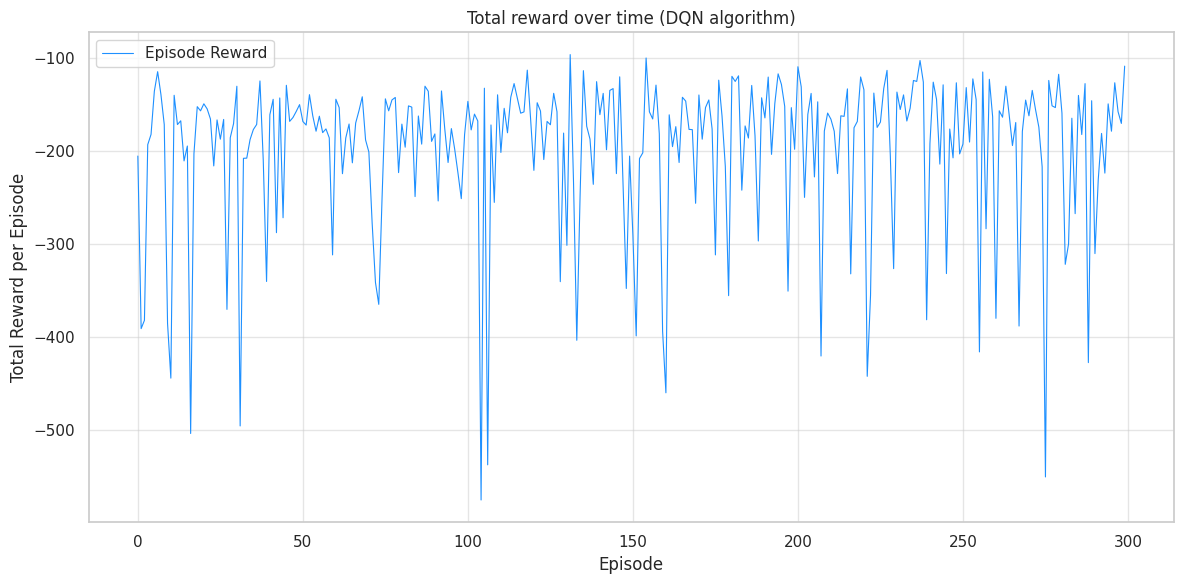

In [ ]:
plt.figure(figsize=(12, 6))

# Plot raw rewards directly
plt.plot(episode_rewards, label='Episode Reward', color='dodgerblue', linewidth=0.8) # Use a thinner line potentially

plt.title('Total reward over time (DQN algorithm)')
plt.xlabel('Episode')
plt.ylabel('Total Reward per Episode')
plt.legend()
plt.grid(True, alpha=0.5) # Lighter grid
plt.tight_layout() # Adjust layout
plt.show()


### 4.3 Implementing a basic loss function (Taylor rule)

A Taylor‐type rule is the most common simple benchmark in monetary‐policy studies. In its standard form it says the nominal bank rate should respond both to the current inflation gap and to the output gap.

Average Taylor penalty (higher = worse): 5.8465


<ipython-input-31-4eb9db357907>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  environment['i_taylor'] = taylor_rule(
<ipython-input-31-4eb9db357907>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  environment['loss_taylor'] = -(
<ipython-input-31-4eb9db357907>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

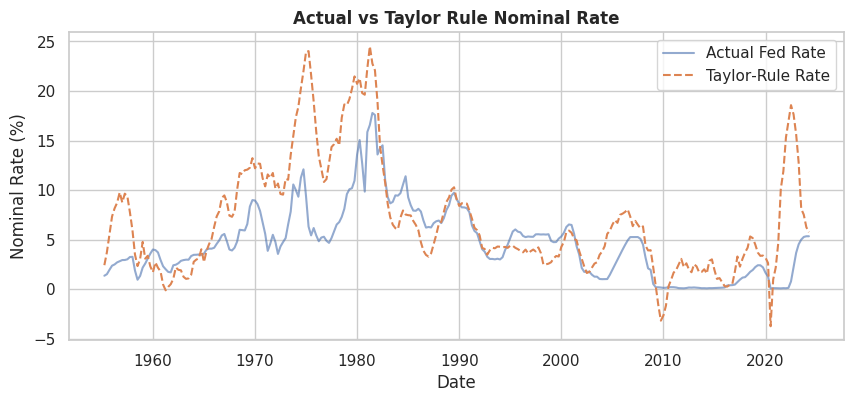

In [ ]:
#Using Taylor Rule as a basic comparison to the RL-learned rule.
def taylor_rule(pi, gap, r_star=2.0, pi_star=2.0, alpha_pi=1.5, alpha_y=0.5):
    """
    Compute the Taylor‐rule rate.
    pi   : current inflation (%)
    gap  : current output gap (%)
    returns nominal rate (%)
    """
    rate = (r_star + pi + alpha_pi*(pi - pi_star) + alpha_y*gap)
    return rate

#Computing the Taylor prescription
environment['i_taylor'] = taylor_rule(
    pi = environment['inflation'],
    gap= environment['output_gap'],
    r_star=2.0,
    pi_star=2.0,
    alpha_pi=1.5,
    alpha_y=0.5
)

#Computing the central‐bank loss of the Taylor rule
#Using the same quadratic loss as in the environment
omega_pi = 0.5
omega_y  = 0.5

#Loss at each date
environment['loss_taylor'] = -(
    omega_pi * (environment['inflation'] - 2.0)**2
  + omega_y  * (environment['output_gap']  - 0.0)**2
)

environment['penalty_taylor'] = -environment['loss_taylor']

#Summarising performance
mean_penalty = environment['penalty_taylor'].mean()
print(f"Average Taylor penalty (higher = worse): {mean_penalty:.4f}")

plt.figure(figsize=(10,4))
plt.plot(environment.index, environment['bank_rate'], label='Actual Fed Rate', alpha=0.6)
plt.plot(environment.index, environment['i_taylor'], label='Taylor‐Rule Rate', linestyle='--')
plt.legend()
plt.title("Actual vs Taylor Rule Nominal Rate", fontweight="bold")
plt.xlabel("Date")
plt.ylabel("Nominal Rate (%)")
plt.show()

## 5 Evaluation

## 6 CONCLUSIONS

## 7 REFERENCES


- Ballesteros S., Leone, A., Ramírez, G. and Kaan Y (2025). Optimal Monetary Policy Using
Reinforcement Learning. London School of Economics.

- Debortoli, D., Kim, J., Lindé, J., & Nunes, R. (2019). Designing a simple loss function for central banks: Does a dual mandate make sense?. The Economic Journal, 129(621), 2010-2038.

- Grabowski, J. (2025). Reinforcement Learning in Central Banking. Available in: www.jbgrabowski.com/notebooks/central-bank/

- Hinterlang, N., & Tanzer, A. (2021). Optimal monetary policy using reinforcement
learning. Discussion Paper No 51/2021, Deutsche Bundesbank.

- Joseph, A.. Deep reinforcement learning in a monetary model (2019). Technical report, Bank of England, 2021.

- Li, S. E. (2023). Reinforcement learning for sequential decision and optimal control.

- Sutton, R. S., & Barto, A. G. (1998). Reinforcement learning: An introduction (Vol. 1, No. 1, pp. 9-11). Cambridge: MIT press.

- Svensson, L. E. (2020). Monetary Policy Strategies for the Federal Reserve. International Journal of Central Banking, 16(1):133-193.

-  Taylor, J. (1993). Discretion versus policy rules in practice. Carnegie-Rochester Conference
Series on Public Policy, 39:195–214.


 # Environment backup code

In [ ]:
class EconomyEnv(gym.Env):
    def __init__(
        self,
        model_y,            #SVAR/OLS model for output gap
        model_pi,           #SVAR/OLS model for inflation
        historical_df,      #Full dataframe for sampling.
        lookback_periods=2, #Number of "quarters" included in the state
        inflation_target=2.0,
        output_gap_target=0.0,
        max_steps=50, #Length of an episode
        mode='discrete',
        min_i=0, #Lower bound for rate action
        max_i=20 #Upper bound for rate action
    ):

        super(EconomyEnv, self).__init__() # Calling parent class

        #Store initial DataFrame and reset index
        self.model_y = model_y       #The trained model for predicting Output Gap
        self.model_pi = model_pi     #The trained model for predicting Inflation
        self.lookback_periods = lookback_periods
        self.inflation_target = inflation_target
        self.output_gap_target = output_gap_target
        self.historical_df = historical_df.reset_index(drop=True).copy()
        #self.df = historical_df.iloc[0:3].copy() ###What is the point of this?
        self.max_steps = max_steps  # number of timesteps per episode
        self.mode = mode

       # Column references
        self.infl_col = 'inflation'
        self.gap_col  = 'output_gap'
        self.rate_col = 'bank_rate'


        # 1) ACTION SPACE: choose the next interest rate.
        # We set 2 possible modes: discrete and continuous as in http://jbgrabowski.com/notebooks/central-bank/
        if self.mode == 'discrete':
            # Discrete action space with 41 possible interest rates spaced equally between 0 and 20
            self.values = np.linspace(min_i, max_i, num=41)
            self.action_space = gym.spaces.Discrete(41)

        elif self.mode == 'continuous':
            self.action_space = Box(low=min_i, high=max_i, shape=(1,), dtype=np.float32)

        # 2) OBSERVATION SPACE: for each of the last N periods, we store
        # inflation, output_gap, interest_rate and interest_rate(t-1)
        obs_space_size = 3 * self.lookback_periods # + 1
        if mode == 'discrete':
            self.observation_space = np.linspace(min_i, max_i,num=41)
            self.observation_space= gym.spaces.Discrete(41)

        elif mode == 'continuous':
            self.observation_space = Box(
                low=-np.inf, high=np.inf, shape=(obs_space_size,), dtype=np.float32
        )

        self.current_idx = self.lookback_periods
        self.done = False #Signals episode termination

    def reset(self, seed=None, options=None):
        """
        Reset the environment:
          1. Choose a random start index
          2. Initialize self.df with 3 consecutive rows starting from the random index.
          3. Reset step counters and done flag.
          4. Return the initial observation.
        """
        super().reset(seed=seed)

        # Calculate the maximum possible starting index
        required_rows = self.lookback_periods + 1  # 2 lookbacks + 1 current step = 3 rows
        max_start = len(self.historical_df) - required_rows

        if max_start <= 0:
            raise ValueError(
                "Df too small for the given lookback_periods. "
                "Reduce lookback_periods or provide more data."
            )

        # Randomly select a starting index so that each episode begins in a different quarter
        random_start_index = self.np_random.integers(low=0, high=max_start + 1)

        # Initialize self.df with 3 consecutive rows from the original DataFrame
        self.df = self.historical_df.iloc[random_start_index:random_start_index + required_rows].reset_index(drop=True).copy()

        # Set current_idx to point to the last row in the initial df
        self.current_idx = self.lookback_periods  # Zero-based indexing

        # Reset step counters and done flag
        self.episode_step = 0
        self.done = False

        # Get the initial observation
        obs = self._get_state()
        info = {}
        return obs, info


    def step(self, action):
        """
        1. Parse the current state
        2. Construct vectors for model_pi sm_model_y
        3. Predict next_output_gap and next_inflation
        4. Compute reward
        5. Append new row to DataFrame
        6. Advance time index
        7. Return (state, reward, done, info)
        """
        if self.done:
            raise RuntimeError("Environment is done. Call reset().")

        self.episode_step += 1

        # Action is the chosen interest rate for this step
        interest_rate = float(action[0])
        # Current state (shape: (3*lookback_periods + 1,))
        state = self._get_state()

        # ---------------------------------------------------------
        # 1) Parse the state and lagged variables
        # ---------------------------------------------------------
        # Let's label them (assuming lookback_periods=2)
        inflation_t2        = state[0]      # inflation(t-2)
        interest_rate_t2    = state[1]  # interest_rate(t-2)
        output_gap_t2       = state[2]     # output_gap(t-2)
        inflation_t1        = state[3]      # inflation(t-1)
        interest_rate_t1    = state[4]  # interest_rate(t-1)
        output_gap_t1       = state[5]     # output_gap(t-1)
        # state[6] is interest_rate(t-1) repeated in your original code
        # (You might want to adjust that logic—see explanation below.)

        # ---------------------------------------------------------
        # 2.a) Construct model_y features
        # ---------------------------------------------------------
        features_y = pd.DataFrame({
            'L1_y': [output_gap_t1],
            'L1_pi': [inflation_t1],
            'L1_i': [interest_rate_t1],
            'L2_i': [interest_rate_t2]
        })

        # Predict the next output gap
        next_output_gap = self.model_y.predict(features_y)[0]

        # ---------------------------------------------------------
        # 2.b) Construct model_pi features
        # ---------------------------------------------------------
        features_pi = pd.DataFrame({
            'output_gap': [next_output_gap],
            'L1_y': [output_gap_t1],
            'L2_y': [output_gap_t2],
            'L1_pi': [inflation_t1],
            'L2_pi': [inflation_t2],
            'L1_i': [interest_rate_t1],
            'L2_i': [interest_rate_t2]
        })

        # 3) Predict the next inflation
        next_inflation = self.model_pi.predict(features_pi)[0] #Calling the SVAR/OLS model

        # ---------------------------------------------------------
        # 4) Compute reward
        #    Loss function as set above in the pynb
        # ---------------------------------------------------------
        reward = -(
            0.5 * (next_inflation - self.inflation_target) ** 2
            + 0.5 * (next_output_gap - self.output_gap_target) ** 2
        )

        # ---------------------------------------------------------
        # 5) Append new row to the DataFrame
        # ---------------------------------------------------------
        new_row = {
            self.cols['inflation']: next_inflation,
            self.cols['output_gap']: next_output_gap,
            self.cols['interest_rate']: interest_rate
        }

        self.df = pd.concat([self.df, pd.DataFrame([new_row])], ignore_index=True)

        # ---------------------------------------------------------
        # 6) Advance time index and check termination
        # ---------------------------------------------------------
        self.current_idx += 1

        if self.episode_step >= self.max_steps:
            self.done = True

        # 7) Return the new state, reward, done, truncated, info

        truncated = False

        return self._get_state(), reward, self.done, truncated, {}

    def _get_state(self):
        """
        Array of shape (3*lookback_periods + 1,).
        For example, when lookback=2, we collect:
          [inflation(t-2), rate(t-2), gap(t-2), inflation(t-1), rate(t-1), gap(t-1)]
        """
        # Retrieve the current row and the previous row
        row_t_minus_1 = self.df.iloc[self.current_idx]
        row_t_minus_2 = self.df.iloc[self.current_idx - 1]

        # Convert both rows to lists
        current_row_list = row_t_minus_1.tolist()
        previous_row_list = row_t_minus_2.tolist()

        # Combine the two lists
        state = previous_row_list + current_row_list

        return np.array(state, dtype=np.float32)

In [ ]:
action = [1000000]
state, reward, done, truncated, info = env.step(action)
print("State: ", state)
print(f"Action: {action}, Reward: {reward}, Done: {done}")
print(env.df)

In [ ]:
import random
from collections import deque, namedtuple

import gym
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from gym import spaces
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# ----------------------------------------
# 1) CUSTOM ECONOMY ENVIRONMENT (SVAR)
# ----------------------------------------
class EconomyEnv(gym.Env):
    def __init__(self, model_y, model_pi, historical_df: pd.DataFrame,
                 lookback_periods=2, inflation_target=2.0, output_gap_target=0.0,
                 max_steps=50, mode="discrete", min_i=0.0, max_i=20.0):
        super().__init__()
        # store variables
        self.model_y = model_y
        self.model_pi = model_pi
        self.df_hist = historical_df.reset_index(drop=True)
        self.lookback = lookback_periods
        self.infl_target = inflation_target
        self.gap_target = output_gap_target
        self.max_steps = max_steps
        self.mode = mode
        self.infl_col, self.gap_col, self.rate_col = 'inflation','output_gap','bank_rate'
        # action space
        if mode=="discrete":
            self.values = np.linspace(min_i, max_i, num=41)
            self.action_space = spaces.Discrete(len(self.values))
        else:
            self.action_space = spaces.Box(low=min_i, high=max_i, shape=(1,), dtype=np.float32)
        # observation space: flat vector 3*lookback
        obs_dim = 3*self.lookback
        self.observation_space = spaces.Box(-np.inf, np.inf, (obs_dim,), np.float32)
        # init
        self.reset()

    def reset(self, seed=None, options=None):
        super().reset(seed=seed)
        needed = self.lookback+1
        max_start = len(self.df_hist)-needed
        if max_start<0: raise ValueError("Not enough data")
        start = self.np_random.integers(0, max_start+1)
        self.df = (self.df_hist.iloc[start:start+needed]
                         .reset_index(drop=True).copy())
        self.step_count = 0
        self.current = self.lookback
        self.done = False
        return self._get_state(), {}

    def step(self, action):
        if self.done: raise RuntimeError("Episode done")
        self.step_count += 1
        # decode action → interest_rate
        if self.mode=="discrete":
            idx = int(action)
            i_t = float(self.values[idx])
        else:
            i_t = float(action[0])
        # unpack last two steps
        s = self._get_state()
        π_t2, y_t2, i_t2, π_t1, y_t1, i_t1 = s
        # predict next output gap
        fy = pd.DataFrame({'L1_y':[y_t1],'L1_pi':[π_t1],'L1_i':[i_t1],'L2_i':[i_t2]})
        y_next = self.model_y.predict(fy)[0]
        # predict next inflation
        fπ = pd.DataFrame({
            'output_gap':[y_next],
            'L1_y':[y_t1],'L2_y':[y_t2],
            'L1_pi':[π_t1],'L2_pi':[π_t2],
            'L1_i':[i_t1],'L2_i':[i_t2]
        })
        π_next = self.model_pi.predict(fπ)[0]
        # reward = negative quadratic loss
        reward = -(
            0.5*(π_next - self.infl_target)**2
          + 0.5*(y_next - self.gap_target)**2
        )
        # append new row
        self.df = pd.concat([self.df, pd.DataFrame([{
            self.infl_col:π_next,
            self.gap_col:y_next,
            self.rate_col:i_t
        }])], ignore_index=True)
        self.current += 1
        if self.step_count>=self.max_steps:
            self.done = True
        return self._get_state(), reward, self.done, False, {}

    def _get_state(self):
        rows = self.df.iloc[self.current-self.lookback:self.current]
        arr = rows[[self.infl_col,self.gap_col,self.rate_col]].to_numpy().flatten()
        return arr.astype(np.float32)

# ----------------------------------------
# 2) REPLAY BUFFER
# ----------------------------------------
Transition = namedtuple('Transition',
                        ('state','action','reward','next_state','done'))
class ReplayBuffer:
    def __init__(self, capacity):
        self.buf = deque(maxlen=capacity)
    def push(self, *args):
        self.buf.append(Transition(*args))
    def sample(self, n):
        return random.sample(self.buf, n)
    def __len__(self):
        return len(self.buf)

# ----------------------------------------
# 3) Q-NETWORK
# ----------------------------------------
class QNetwork(nn.Module):
    def __init__(self, s_dim, a_dim, h_dim=128):
        super().__init__()
        self.l1 = nn.Linear(s_dim,h_dim)
        self.l2 = nn.Linear(h_dim,h_dim)
        self.l3 = nn.Linear(h_dim,a_dim)
    def forward(self,x):
        x = F.relu(self.l1(x))
        x = F.relu(self.l2(x))
        return self.l3(x)

# ----------------------------------------
# 4) DQN AGENT
# ----------------------------------------
import torch
class DQNAgent:
    def __init__(self, env,
                 buffer_cap=50000, batch_size=64,
                 gamma=0.99,
                 eps_start=1.0, eps_end=0.1, eps_decay_steps=50000,
                 lr=1e-4, target_update=1000, hidden_dim=128):
        self.env = env
        self.s_dim = env.observation_space.shape[0]
        self.a_dim = env.action_space.n
        self.buf = ReplayBuffer(buffer_cap)
        self.batch = batch_size
        self.gamma = gamma
        # epsilon schedule
        self.eps = eps_start
        self.eps_min = eps_end
        self.eps_decay = (eps_end/eps_start)**(1/eps_decay_steps)
        self.steps=0; self.target_update=target_update
        # device
        self.dev = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        # networks
        self.q_net = QNetwork(self.s_dim,self.a_dim,hidden_dim).to(self.dev)
        self.t_net = QNetwork(self.s_dim,self.a_dim,hidden_dim).to(self.dev)
        self.t_net.load_state_dict(self.q_net.state_dict())
        self.t_net.eval()
        # optimizer & loss
        self.opt = optim.Adam(self.q_net.parameters(),lr=lr)
        self.loss_fn = nn.SmoothL1Loss()  # Huber
    def choose(self, state):
        if random.random()<self.eps:
            return self.env.action_space.sample()
        st = torch.tensor(state,device=self.dev).float().unsqueeze(0)
        with torch.no_grad():
            qv = self.q_net(st)
        return int(qv.argmax().item())
    def push(self,s,a,r,s2,d): self.buf.push(s,a,r,s2,d)
    def update(self):
        if len(self.buf)<self.batch: return None
        batch = Transition(*zip(*self.buf.sample(self.batch)))
        S = torch.tensor(np.array(batch.state),device=self.dev).float()
        A = torch.tensor(batch.action,device=self.dev).long().unsqueeze(1)
        R = torch.tensor(batch.reward,device=self.dev).float().unsqueeze(1)
        S2= torch.tensor(np.array(batch.next_state),device=self.dev).float()
        D = torch.tensor(batch.done,device=self.dev).float().unsqueeze(1)
        # target (Double DQN)
        with torch.no_grad():
            # select a'
            a_prime = self.q_net(S2).argmax(dim=1,keepdim=True)
            q_next = self.t_net(S2).gather(1,a_prime)
            td_target = R + self.gamma * q_next * (1-D)
        # pred
        q_pred = self.q_net(S).gather(1,A)
        loss = self.loss_fn(q_pred, td_target)
        self.opt.zero_grad()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(self.q_net.parameters(),max_norm=1.0)
        self.opt.step()
        # update target
        self.steps+=1
        if self.steps % self.target_update==0:
            self.t_net.load_state_dict(self.q_net.state_dict())
            print(f"[Info] Target net updated at step {self.steps}")
        # decay eps
        self.eps = max(self.eps_min, self.eps*self.eps_decay)
        return loss.item()

# ----------------------------------------
# 5) TRAINING & REWARD SMOOTHING
# ----------------------------------------
def train(agent, env, episodes=300, train_start=1000):
    rewards=[]; losses=[]
    for ep in range(1,episodes+1):
        s,_ = env.reset(); done=False; total=0; ep_loss=0; upd=0
        while not done:
            a = agent.choose(s)
            s2,r,done,_,_ = env.step(a)
            agent.push(s,a,r,s2,done)
            s=s2; total+=r
            # update
            if agent.steps>train_start:
                l=agent.update()
                if l is not None: ep_loss+=l; upd+=1
        rewards.append(total)
        losses.append(ep_loss/upd if upd>0 else 0)
        if ep%50==0:
            ma = np.mean(rewards[-50:])
            ml = np.mean(losses[-50:])
            print(f"Episode {ep}: MA-50 Reward={ma:.1f}, MA-50 Loss={ml:.4f}, eps={agent.eps:.3f}")
    # smooth reward
    window=10
    sm = np.convolve(rewards, np.ones(window)/window,mode='valid')
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10,4))
    plt.plot(rewards, alpha=0.3,label='Raw')
    plt.plot(range(window-1,episodes), sm, color='C1',label=f'MA-{window}')
    plt.title("Episode Rewards"); plt.legend(); plt.show()
    return rewards, losses

# ----------------------------------------
# 6) TAYLOR RULE & BASELINE COMP
# ----------------------------------------
def taylor(pi,gap,r_star=2.0,pi_star=2.0,α_pi=1.5,α_y=0.5):
    return r_star + pi + α_pi*(pi-pi_star) + α_y*(gap)

def eval_policy(env, agent, episodes=10, taylor_mode=False):
    totals=[]
    for _ in range(episodes):
        s,_=env.reset(); done=False; tot=0
        while not done:
            if taylor_mode:
                # pick taylor action
                pi, gap = s[-3], s[-2]  # last step
                cont = taylor(pi,gap)
                a = abs(env.values-cont).argmin()
            else:
                a = agent.choose(s)
            s,r,done,_,_ = env.step(a)
            tot += r
        totals.append(tot)
    return totals

# ----------------------------------------
# 7) PUT IT ALL TOGETHER
# ----------------------------------------
# assume `historical` DF exists and SVAR models:
# sm_model_y, sm_model_pi = ... your fitted LinearRegression / statsmodels OLS

env = EconomyEnv(model_y=sm_model_y,
                 model_pi=sm_model_pi,
                 historical_df=historical,
                 lookback_periods=2,
                 inflation_target=2.0,
                 output_gap_target=0.0,
                 max_steps=50,
                 mode="discrete",
                 min_i=0.0, max_i=20.0)

agent = DQNAgent(env,
                 buffer_cap=50000, batch_size=64,
                 gamma=0.99,
                 eps_start=1.0, eps_end=0.1, eps_decay_steps=20000,
                 lr=1e-4, target_update=1000,
                 hidden_dim=128)

print("Starting training...")
rewards, losses = train(agent, env, episodes=300, train_start=1000)

print("Evaluating policies...")
r_taylor = eval_policy(env, agent, episodes=10, taylor_mode=True)
r_dqn    = eval_policy(env, agent, episodes=10, taylor_mode=False)
print("Taylor:", np.round(r_taylor,1), "Mean=", np.mean(r_taylor))
print("DQN:   ", np.round(r_dqn,1),   "Mean=", np.mean(r_dqn))
impr = (np.mean(r_dqn)-np.mean(r_taylor))/abs(np.mean(r_taylor))*100
print(f"DQN improves on Taylor by {impr:.2f}%")


Starting training...


ValueError: shapes (1,4) and (5,) not aligned: 4 (dim 1) != 5 (dim 0)